# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Selenium Doc](https://www.selenium.dev/documentation/)
- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `Selenium` and `pandas` are imported for you.

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

#### Enable the options you may need. In the next cell you have an example of them but you can choose to use them or not.

In [2]:
#driver configuration
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
# opciones.add_argument('cookies')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')

C:\Users\augus\AppData\Local\Temp\ipykernel_11748\3819515284.py:6: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  opciones.headless=False    # si True, no aperece la ventana (headless=no visible)


#### Download, parse, and print the content from the Trending Developers page from GitHub:

In [3]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [4]:
#your code
PATH = ChromeDriverManager().install()     # instala el driver de chrome

driver=webdriver.Chrome(PATH,options=opciones)       # abre una venta una de chrome

driver.get(url)

C:\Users\augus\AppData\Local\Temp\ipykernel_11748\3132599470.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(PATH,options=opciones)       # abre una venta una de chrome


#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [5]:
#your code
from selenium.webdriver.common.by import By
import time

import warnings
warnings.filterwarnings('ignore')

In [6]:
tabla = driver.find_elements(By.CLASS_NAME,'Box-row d-flex'.replace(' ','.'))

dev_trents = []
for fila in tabla:
    name = fila.find_element(By.CLASS_NAME,'h3 lh-condensed'.replace(' ','.')).text
    try:
        alias =fila.find_element(By.CLASS_NAME,'f4 text-normal mb-1'.replace(' ','.')).text
    except:
        alias = None
    dev_trents.append((name,alias))
dev_trents

[('Steven Tey', 'steven-tey'),
 ('pilcrowOnPaper', None),
 ('Lianmin Zheng', 'merrymercy'),
 ('Henrik Rydgård', 'hrydgard'),
 ('Andreas Thomas', 'chronark'),
 ('Raphaël Benitte', 'plouc'),
 ('Ariel Mashraki', 'a8m'),
 ('Georgios Konstantopoulos', 'gakonst'),
 ('Bas Nijholt', 'basnijholt'),
 ('Tom Payne', 'twpayne'),
 ('dgtlmoon', None),
 ('Mattias Wadman', 'wader'),
 ('Laurent Mazare', 'LaurentMazare'),
 ('Anders Jenbo', 'AJenbo'),
 ('Tianon Gravi', 'tianon'),
 ('lllyasviel', None),
 ('Andrea Aime', 'aaime'),
 ('Luca Palmieri', 'LukeMathWalker'),
 ('Harrison Chase', 'hwchase17'),
 ('Eric Meadows-Jönsson', 'ericmj'),
 ('Brad Fitzpatrick', 'bradfitz'),
 ('Jerry Liu', 'jerryjliu'),
 ('Fons van der Plas', 'fonsp'),
 ('Simon L.', 'szaimen'),
 ('Silvio Traversaro', 'traversaro')]

#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [7]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'
driver.get(url)

In [8]:
#your code
tabla = driver.find_elements(By.CLASS_NAME,'Box-row')

rep_trent = [fila.find_element(By.CLASS_NAME,'h3 lh-condensed'.replace(' ','.')).text
             for fila in tabla]
rep_trent
    

['gventuri / pandas-ai',
 'mlc-ai / mlc-llm',
 'xtekky / gpt4free',
 'AIGC-Audio / AudioGPT',
 'karpathy / nanoGPT',
 'mishalhossin / Discord-Chatbot-Gpt4Free',
 'xtekky / chatgpt-clone',
 'georgia-tech-db / eva',
 'frappe / frappe',
 'farshadz1997 / Microsoft-Rewards-bot',
 'mlc-ai / web-llm',
 'ZrrSkywalker / LLaMA-Adapter',
 'psf / black',
 'Asabeneh / 30-Days-Of-Python',
 'gptforfree / gpt4free',
 'Arize-ai / phoenix',
 'KurtBestor / Hitomi-Downloader',
 'Luodian / Otter',
 'gd3kr / BlenderGPT',
 'yerfor / GeneFace',
 'adieyal / sd-dynamic-prompts',
 'ansible / ansible',
 'WeOpenML / PandaLM',
 'apache / tvm',
 'openedx / edx-platform']

#### Display all the image links from Walt Disney wikipedia page

In [11]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'
driver.get(url)

In [18]:
#your code

from IPython.display import Image

links = [fila.get_attribute('src') for fila in driver.find_elements(By.TAG_NAME,'img')]

links

['https://en.wikipedia.org/static/images/icons/wikipedia.png',
 'https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 'https://en.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 'https://upload.wikimedia.org/wikipedia/foundation/2/20/CloseWindow19x19.png',
 'https://upload.wikimedia.org/wikipedia/donate/thumb/b/b6/WLE_Austria_Logo_%28no_text%29_local.svg/50px-WLE_Austria_Logo_%28no_text%29_local.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/8/8c/Extended-protection-shackle.svg/20px-Extended-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3

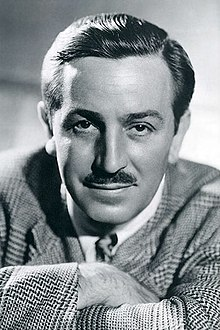

In [19]:
Image(links[7])


#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [20]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 
driver.get(url)

In [21]:
#your code

tablas = driver.find_element(By.CLASS_NAME,'mw-parser-output').find_elements(By.TAG_NAME,'ul')

python_links = []

for tabla in tablas:
    for fila in tabla.find_elements(By.TAG_NAME,'li'):
        python_links.append(fila.find_element(By.TAG_NAME,'a').get_property('href'))

python_links

['https://en.wikipedia.org/wiki/Pythonidae',
 'https://en.wikipedia.org/wiki/Python_(genus)',
 'https://en.wikipedia.org/wiki/Python_(mythology)',
 'https://en.wikipedia.org/wiki/Python_(genus)',
 'https://en.wikipedia.org/wiki/Python_(programming_language)',
 'https://en.wikipedia.org/wiki/CMU_Common_Lisp',
 'https://en.wikipedia.org/wiki/PERQ#PERQ_3',
 'https://en.wikipedia.org/wiki/Python_of_Aenus',
 'https://en.wikipedia.org/wiki/Python_(painter)',
 'https://en.wikipedia.org/wiki/Python_of_Byzantium',
 'https://en.wikipedia.org/wiki/Python_of_Catana',
 'https://en.wikipedia.org/wiki/Python_Anghelo',
 'https://en.wikipedia.org/wiki/Python_(Efteling)',
 'https://en.wikipedia.org/wiki/Python_(Busch_Gardens_Tampa_Bay)',
 'https://en.wikipedia.org/wiki/Python_(Coney_Island,_Cincinnati,_Ohio)',
 'https://en.wikipedia.org/wiki/Python_(automobile_maker)',
 'https://en.wikipedia.org/wiki/Python_(Ford_prototype)',
 'https://en.wikipedia.org/wiki/Python_(missile)',
 'https://en.wikipedia.org/

#### Number of Titles that have changed in the United States Code since its last release point 

In [22]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'
driver.get(url)

In [25]:
#your code

# Me devuelve todos los tag's div que tnegan class = usctitlechanged dentro de div

titles = [i.text for i in driver.find_elements(By.XPATH,'//div//div[@class="usctitlechanged"]')]

titles

['Title 1 - General Provisions ٭',
 'Title 2 - The Congress',
 'Title 3 - The President ٭',
 'Title 5 - Government Organization and Employees ٭',
 'Title 6 - Domestic Security',
 'Title 8 - Aliens and Nationality',
 'Title 10 - Armed Forces ٭',
 'Title 12 - Banks and Banking',
 'Title 14 - Coast Guard ٭',
 'Title 15 - Commerce and Trade',
 'Title 16 - Conservation',
 'Title 17 - Copyrights ٭',
 'Title 18 - Crimes and Criminal Procedure ٭',
 'Title 20 - Education',
 'Title 21 - Food and Drugs',
 'Title 22 - Foreign Relations and Intercourse',
 'Title 25 - Indians',
 'Title 26 - Internal Revenue Code',
 'Title 28 - Judiciary and Judicial Procedure ٭',
 'Title 29 - Labor',
 'Title 31 - Money and Finance ٭',
 'Title 32 - National Guard ٭',
 'Title 33 - Navigation and Navigable Waters',
 'Title 34 - Crime Control and Law Enforcement',
 'Title 36 - Patriotic and National Observances, Ceremonies, and Organizations ٭',
 'Title 37 - Pay and Allowances of the Uniformed Services ٭',
 "Title 38 - 

#### A Python list with the top ten FBI's Most Wanted names 

In [26]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'
driver.get(url)

In [29]:
#your code 

fbi = [e.text for e in driver.find_elements(By.XPATH,'//li//h3[@class="title"]')]
fbi


['BHADRESHKUMAR CHETANBHAI PATEL',
 'WILVER VILLEGAS-PALOMINO',
 'ALEJANDRO ROSALES CASTILLO',
 'RUJA IGNATOVA',
 'ARNOLDO JIMENEZ',
 'OMAR ALEXANDER CARDENAS',
 'ALEXIS FLORES',
 'YULAN ADONAY ARCHAGA CARIAS',
 'MICHAEL JAMES PRATT',
 'JOSE RODOLFO VILLARREAL-HERNANDEZ']

####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [92]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'
driver.get(url)

In [93]:
#your code
eq = []

for i in range(20):
    reg = dict()
    date,time = driver.find_elements(By.XPATH,'//td//b//a')[i].text.split()
    reg['date'] = date
    reg['time'] = time
    lat = driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev1"]')[2*i].text
    lat += ' ' + driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev2"]')[3*i].text
    lon = driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev1"]')[2*i+1].text
    lon += ' ' + driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev2"]')[3*i+1].text
    reg['Latitude'] = lat
    reg['Longitude'] = lon
    reg['depth'] = driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev3"]')[i].text
    reg['Magnitude'] = driver.find_elements(By.XPATH,'//body//tr//td[@class="tabev2"]')[3*i+2].text
    reg['Region'] = driver.find_elements(By.XPATH,'//body//tr//td[@class="tb_region"]')[i].text
    eq.append(reg)
    
pd.DataFrame(eq)


,date,time,Latitude,Longitude,depth,Magnitude,Region
0,2023-05-03,20:26:06.8,38.32 N,38.18 E,8,2.1,EASTERN TURKEY
1,2023-05-03,20:22:24.9,42.31 N,0.76 E,2,2.3,PYRENEES
2,2023-05-03,20:19:29.0,37.90 N,36.52 E,4,2.0,CENTRAL TURKEY
3,2023-05-03,20:15:35.0,8.81 N,127.36 E,19,3.4,PHILIPPINE ISLANDS REGION
4,2023-05-03,20:09:12.8,36.26 N,7.83 W,11,2.3,STRAIT OF GIBRALTAR
5,2023-05-03,20:07:41.0,30.29 S,71.61 W,22,2.7,"COQUIMBO, CHILE"
6,2023-05-03,20:02:16.4,18.31 N,68.72 W,127,4.3,DOMINICAN REPUBLIC
7,2023-05-03,20:01:59.0,8.20 S,118.87 E,17,2.7,"SUMBAWA REGION, INDONESIA"
8,2023-05-03,19:52:36.0,51.41 S,72.48 W,22,2.8,"MAGALLANES, CHILE"
9,2023-05-03,19:43:03.9,37.87 N,36.66 E,5,2.8,CENTRAL TURKEY


#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
#your code

#### List all language names and number of related articles in the order they appear in wikipedia.org

In [94]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'
driver.get(url)

In [106]:
#your code
lan = [i.text for i in driver.find_elements(By.XPATH,'//div//a//strong')]
art = [''.join(i.text.split()).replace('+','+ ') for i in driver.find_elements(By.XPATH,'//div//a//small')]
wiki_lan = {k:v for k,v in zip(lan,art)}
wiki_lan

{'Español': '1854000+ artículos',
 'English': '6644000+ articles',
 'Русский': '1909000+ статей',
 '日本語': '1370000+ 記事',
 'Deutsch': '2792000+ Artikel',
 'Français': '2514000+ articles',
 'Italiano': '1806000+ voci',
 '中文': '1347000+ 条目/條目',
 'فارسی': '959000+ مقاله',
 'Português': '1101000+ artigos'}

#### A list with the different kind of datasets available in data.gov.uk 

In [107]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'
driver.get(url)

In [109]:
#your code 
kind_data = [i.text for i in driver.find_elements(By.XPATH,'//li//h3//a')]
kind_data

['Business and economy',
 'Crime and justice',
 'Defence',
 'Education',
 'Environment',
 'Government',
 'Government spending',
 'Health',
 'Mapping',
 'Society',
 'Towns and cities',
 'Transport',
 'Digital service performance',
 'Government reference data']

#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [110]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'
driver.get(url)

In [114]:
#your code
cols = [i.text for i in driver.find_elements(By.XPATH,'//table[@class="wikitable sortable static-row-numbers jquery-tablesorter"]//thead//tr//th')]
data = []
for fila in driver.find_elements(By.XPATH,'//table[@class="wikitable sortable static-row-numbers jquery-tablesorter"]//tbody//tr'):
    temp = []
    for e in fila.find_elements(By.XPATH,'//td'):
        temp.append(e.text)
    data.append(temp)
data
    

KeyboardInterrupt: 

### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code